In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, shutil   
#os 모듈은 운영 체제와 상호 작용하기위한 수십 가지 함수들을 제공
#shutil 파일에 관한 기능을 가지고 있는 함수들을 제공
# https://docs.python.org/ko/3/library/shutil.html 여러 파이썬라이브러리함수들을 살펴볼수 있음
 
original_dataset_dir='./image/image'

base_dir='/content/drive/My Drive/Colab Notebooks/Face_Detection/images/Processed_Images'

train_dir=os.path.join(base_dir, 'train') # os.path.join()--> 경로를 합쳐서 새 경로 생성
# os.mkdir(train_dir)
validation_dir=os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir=os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_toni_dir=os.path.join(train_dir, 'toni')
# os.mkdir(train_toni_dir)
train_stanfield_dir=os.path.join(train_dir, 'stanfield')
# os.mkdir(train_stanfield_dir)
train_michael_dir=os.path.join(train_dir, 'michael')
# os.mkdir(train_michael_dir)
train_evans_dir=os.path.join(train_dir, 'evans')
# os.mkdir(train_evans_dir)
train_creig_dir=os.path.join(train_dir, 'creig')
# os.mkdir(train_creig_dir)
train_christopher_dir=os.path.join(train_dir, 'christopher')
# os.mkdir(train_christopher_dir)
train_unknown_dir=os.path.join(train_dir, 'unknown')
# os.mkdir(train_unknown_dir)


validation_toni_dir=os.path.join(validation_dir, 'toni')
# os.mkdir(validation_toni_dir)
validation_stanfield_dir=os.path.join(validation_dir, 'stanfield')
# os.mkdir(validation_stanfield_dir)
validation_michael_dir=os.path.join(validation_dir, 'michael')
# os.mkdir(validation_michael_dir)
validation_evans_dir=os.path.join(validation_dir, 'evans')
# os.mkdir(validation_evans_dir)
validation_creig_dir=os.path.join(validation_dir, 'creig')
# os.mkdir(validation_creig_dir)
validation_christopher_dir=os.path.join(validation_dir, 'christopher')
# os.mkdir(validation_christopher_dir)
validation_unknown_dir=os.path.join(validation_dir, 'unknown')
# os.mkdir(validation_unknown_dir)



test_toni_dir=os.path.join(test_dir, 'toni')
# os.mkdir(test_toni_dir)
test_stanfield_dir=os.path.join(test_dir, 'stanfield')
# os.mkdir(test_stanfield_dir)
test_michael_dir=os.path.join(test_dir, 'michael')
# os.mkdir(test_michael_dir)
test_evans_dir=os.path.join(test_dir, 'evans')
# os.mkdir(test_evans_dir)
test_creig_dir=os.path.join(test_dir, 'creig')
# os.mkdir(test_creig_dir)
test_christopher_dir=os.path.join(test_dir, 'christopher')
# os.mkdir(test_christopher_dir)
test_unknown_dir=os.path.join(test_dir, 'unknown')
# os.mkdir(test_unknown_dir)


In [10]:
# print('훈련용 creig 이미지 전체 개수:', len(os.listdir(train_creig_dir)))
# print('훈련용 evans 이미지 전체 개수:', len(os.listdir(train_evans_dir)))

# print('검증용 creig 이미지 전체 개수:', len(os.listdir(validation_creig_dir)))
# print('검증용 evans 이미지 전체 개수:', len(os.listdir(validation_evans_dir)))

# print('테스트용 creig 이미지 전체 개수:', len(os.listdir(test_creig_dir))) 
# print('테스트용 evans 이미지 전체 개수:', len(os.listdir(test_evans_dir)))

훈련용 creig 이미지 전체 개수: 326
훈련용 evans 이미지 전체 개수: 278
검증용 creig 이미지 전체 개수: 36
검증용 evans 이미지 전체 개수: 79
테스트용 creig 이미지 전체 개수: 38
테스트용 evans 이미지 전체 개수: 71


In [0]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))   #layers.Dense() : densely-connected NN layer
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax')) 

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator=test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1470 images belonging to 7 classes.
Found 535 images belonging to 7 classes.


In [27]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100





100/100 [==============================] - 694s 7s/step - loss: 1.9151 - acc: 0.2028 - val_loss: 1.9669 - val_acc: 0.0446
Epoch 2/100
100/100 [==============================] - 39s 392ms/step - loss: 1.8877 - acc: 0.2138 - val_loss: 1.9137 - val_acc: 0.1161
Epoch 3/100
100/100 [==============================] - 38s 376ms/step - loss: 1.8418 - acc: 0.2582 - val_loss: 1.8624 - val_acc: 0.2419
Epoch 4/100
100/100 [==============================] - 27s 268ms/step - loss: 1.8117 - acc: 0.2846 - val_loss: 1.7597 - val_acc: 0.3348
Epoch 5/100
100/100 [==============================] - 30s 296ms/step - loss: 1.7610 - acc: 0.3116 - val_loss: 1.7025 - val_acc: 0.4047
Epoch 6/100
100/100 [==============================] - 30s 300ms/step - loss: 1.7243 - acc: 0.3339 - val_loss: 1.5602 - val_acc: 0.4777
Epoch 7/100
100/100 [==============================] - 30s 298ms/step - loss: 1.6977 - acc: 0.3518 - val_loss: 1.6004 - val_acc: 0.4286
Epoch 8/100
100/100 [========================

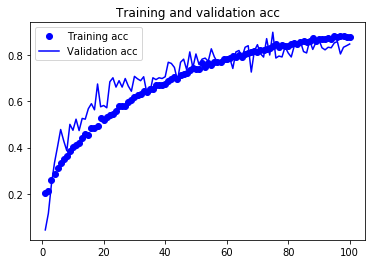

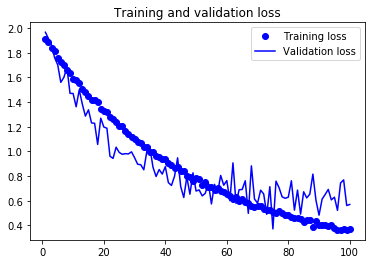

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [29]:
test_generator=test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 541 images belonging to 7 classes.


In [30]:
result = model.evaluate_generator(test_generator, steps=50)
result[1]

0.829987453509454

In [31]:
test_generator.class_indices

{'chirstopher': 0,
 'creig': 1,
 'evans': 2,
 'michael': 3,
 'stanfield': 4,
 'toni': 5,
 'unknown': 6}

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Face_Detection/knives_out_1.h5')